In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
initial_data = pd.read_csv('../cuboid_size_measurements.csv')

## Fragestellung 1: Ist der Zusammenhang zwischen Quadergröße und Ausführungszeit linear?
Es wird vermutet, dass ein linearer Zusammenhang entsteht.

In [3]:
data1 = initial_data
data1['cell_count'] = (data1['length'] * data1['width'] * data1['height'])/1000 # Einheit ist tausend Zellen für bessere Lesbarkeit
data1 = data1.drop(['runName', 'length', 'width', 'height'], axis=1)
data1 = data1.groupby('cell_count').mean()
data_cols = data1.columns
data1['avg'] = data1.mean(axis=1)
data1 = data1.drop(data_cols, axis=1)

data1.reset_index(inplace=True)
data1

,cell_count,avg
0,125.000,5.21875
1,1000.000,20.09375
2,9938.375,450.00000
3,19902.511,1146.62500
4,29791.000,1825.09375
5,39651.821,2532.34375
6,49836.032,4109.78125
7,59776.471,4871.00000
8,64000.000,4830.00000


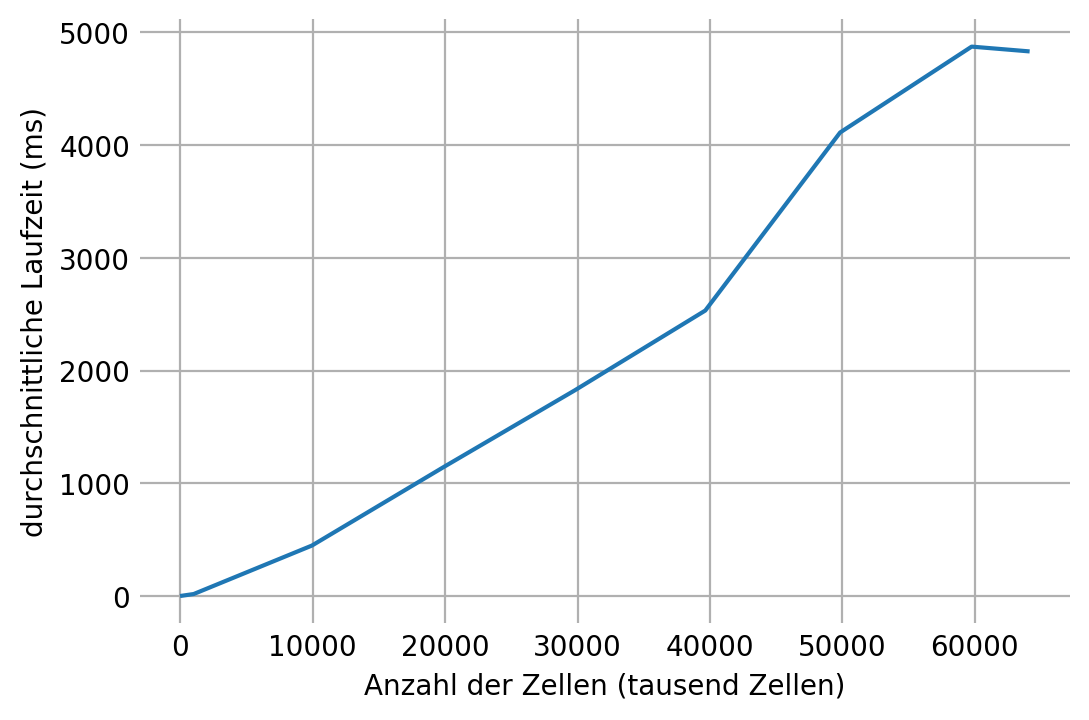

In [4]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.plot(data1['cell_count'], data1['avg'])
ax.set(ylabel='durchschnittliche Laufzeit (ms)', xlabel='Anzahl der Zellen (tausend Zellen)')
ax.ticklabel_format(style='plain')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

ax.grid()

In [5]:
fig.savefig('cuboid_size_linear.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

## Fragestellung 2: Wie ist der Zusammenhang zwischen Ausführungszeit pro Zellen und Quadergröße?

In [6]:
data2 = data1
data2['avg/cell'] = data2['avg']/data2['cell_count']
data2

,cell_count,avg,avg/cell
0,125.000,5.21875,0.041750
1,1000.000,20.09375,0.020094
2,9938.375,450.00000,0.045279
3,19902.511,1146.62500,0.057612
4,29791.000,1825.09375,0.061263
5,39651.821,2532.34375,0.063865
6,49836.032,4109.78125,0.082466
7,59776.471,4871.00000,0.081487
8,64000.000,4830.00000,0.075469


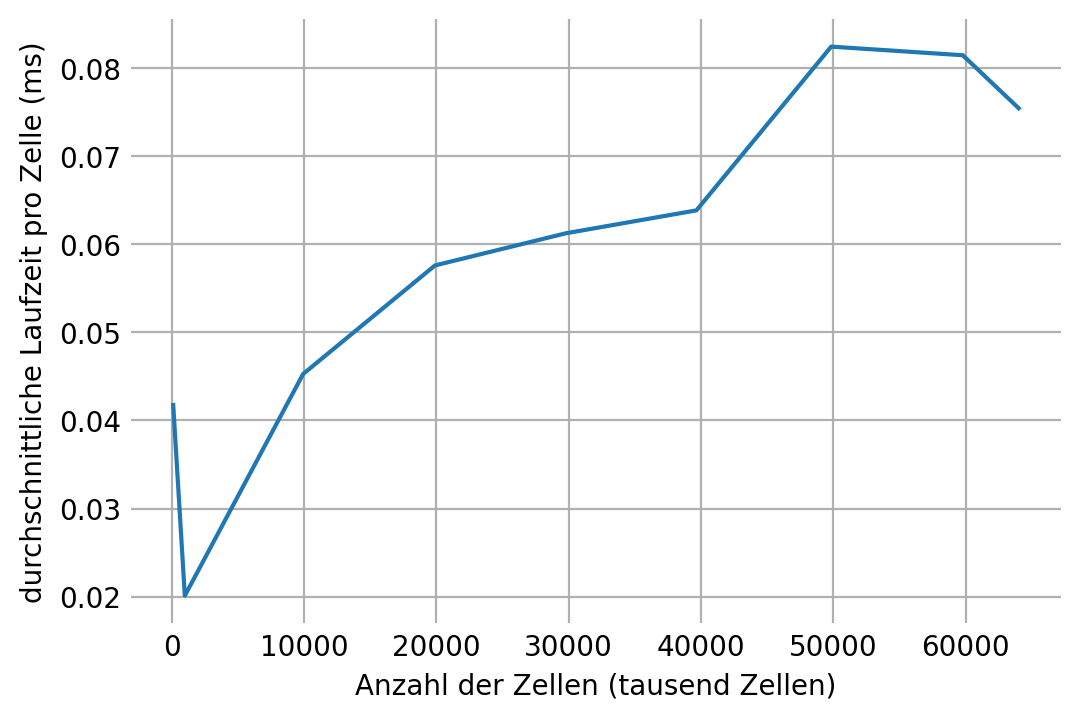

In [7]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.plot(data2['cell_count'], data2['avg/cell'])
ax.set(ylabel='durchschnittliche Laufzeit pro Zelle (ms)', xlabel='Anzahl der Zellen (tausend Zellen)')
ax.ticklabel_format(style='plain')

for spine in ax.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)

ax.grid()

In [96]:
fig.savefig('cuboid_size_linear_per_cell.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')